# <center>Homework2 Report
    
## <center>course: COMP9417
    
## <center>term: 2020T1
    
## <center>full name: Zhaokun Su 

## <center>zID: z5235878

### Question 1
**part(a). [0.5 mark]** 

the accuracy has a general tendency to increase with a larger training size

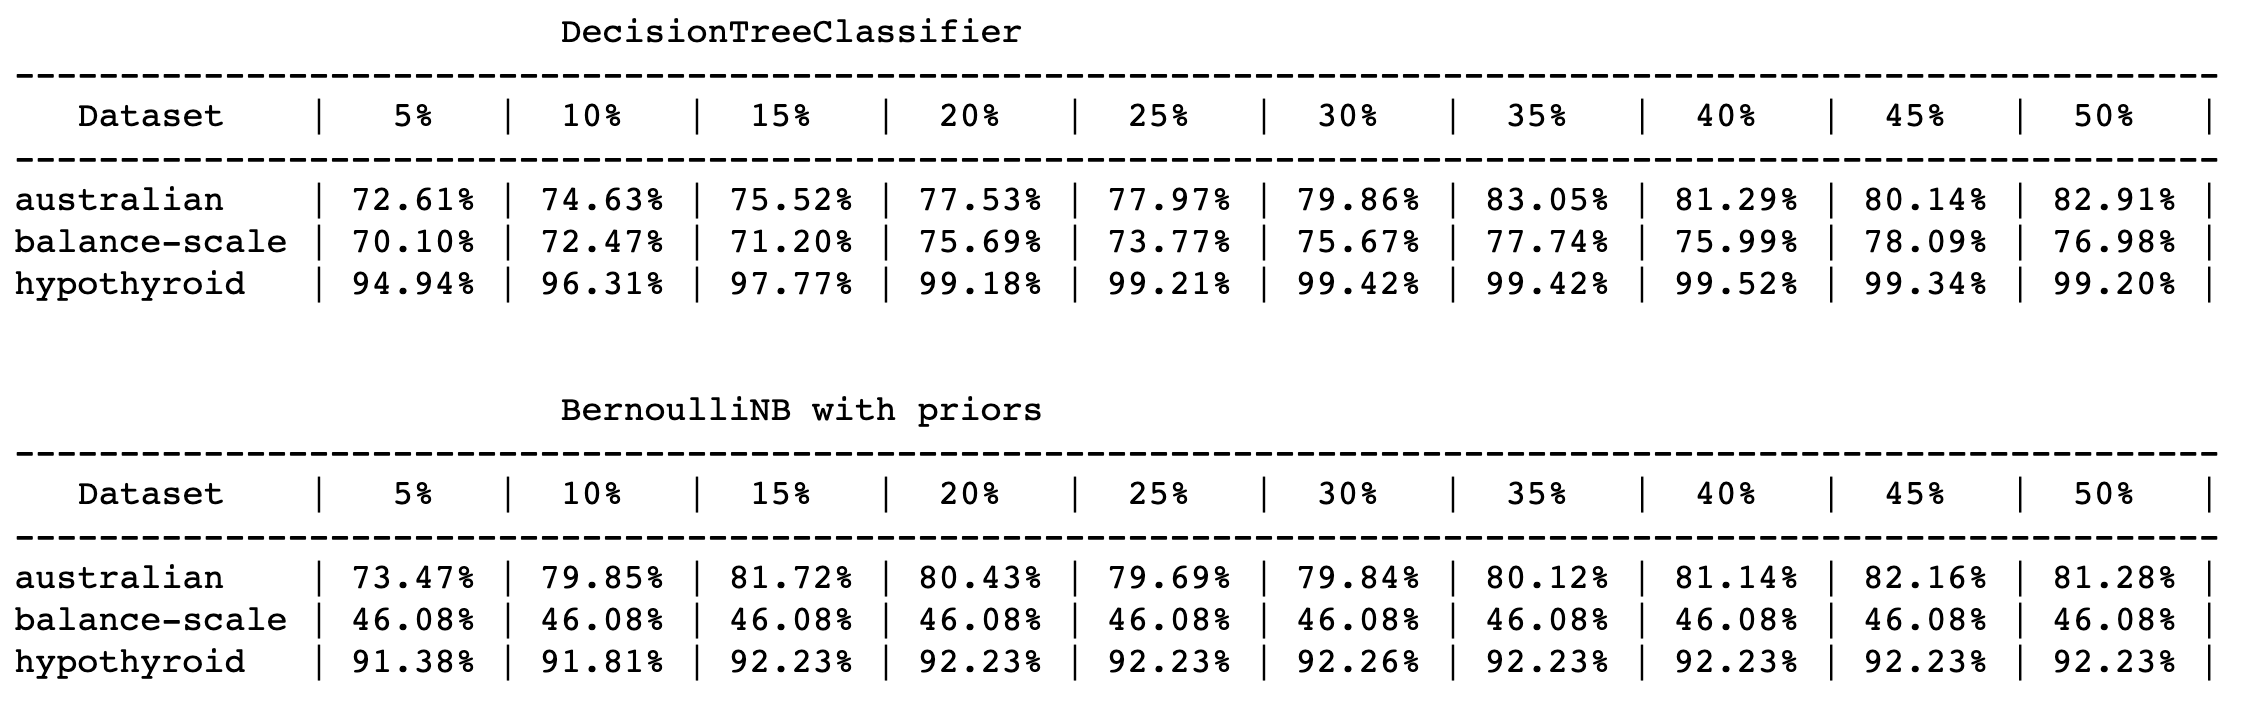

**part(b). [0.5 mark]**

**(1)** none of the 6 models show a learning curve    **False**

**(2)** all of the 6 models show a learning curve    **False**

**(3)** most of the 6 models show a learning curve    **True**

**(4)** All 3 Decision Tree models are generally better than Bernoulli Naive Bayes models    **False**

**(5)** Some Bernoulli Naive Bayes models are better than Decision Tree models    **True**

**so all true statements are (3) and (5)**

**part(c). [0.5 mark]**

#### After adding the new line, BNB model results with and without priors are shown below:

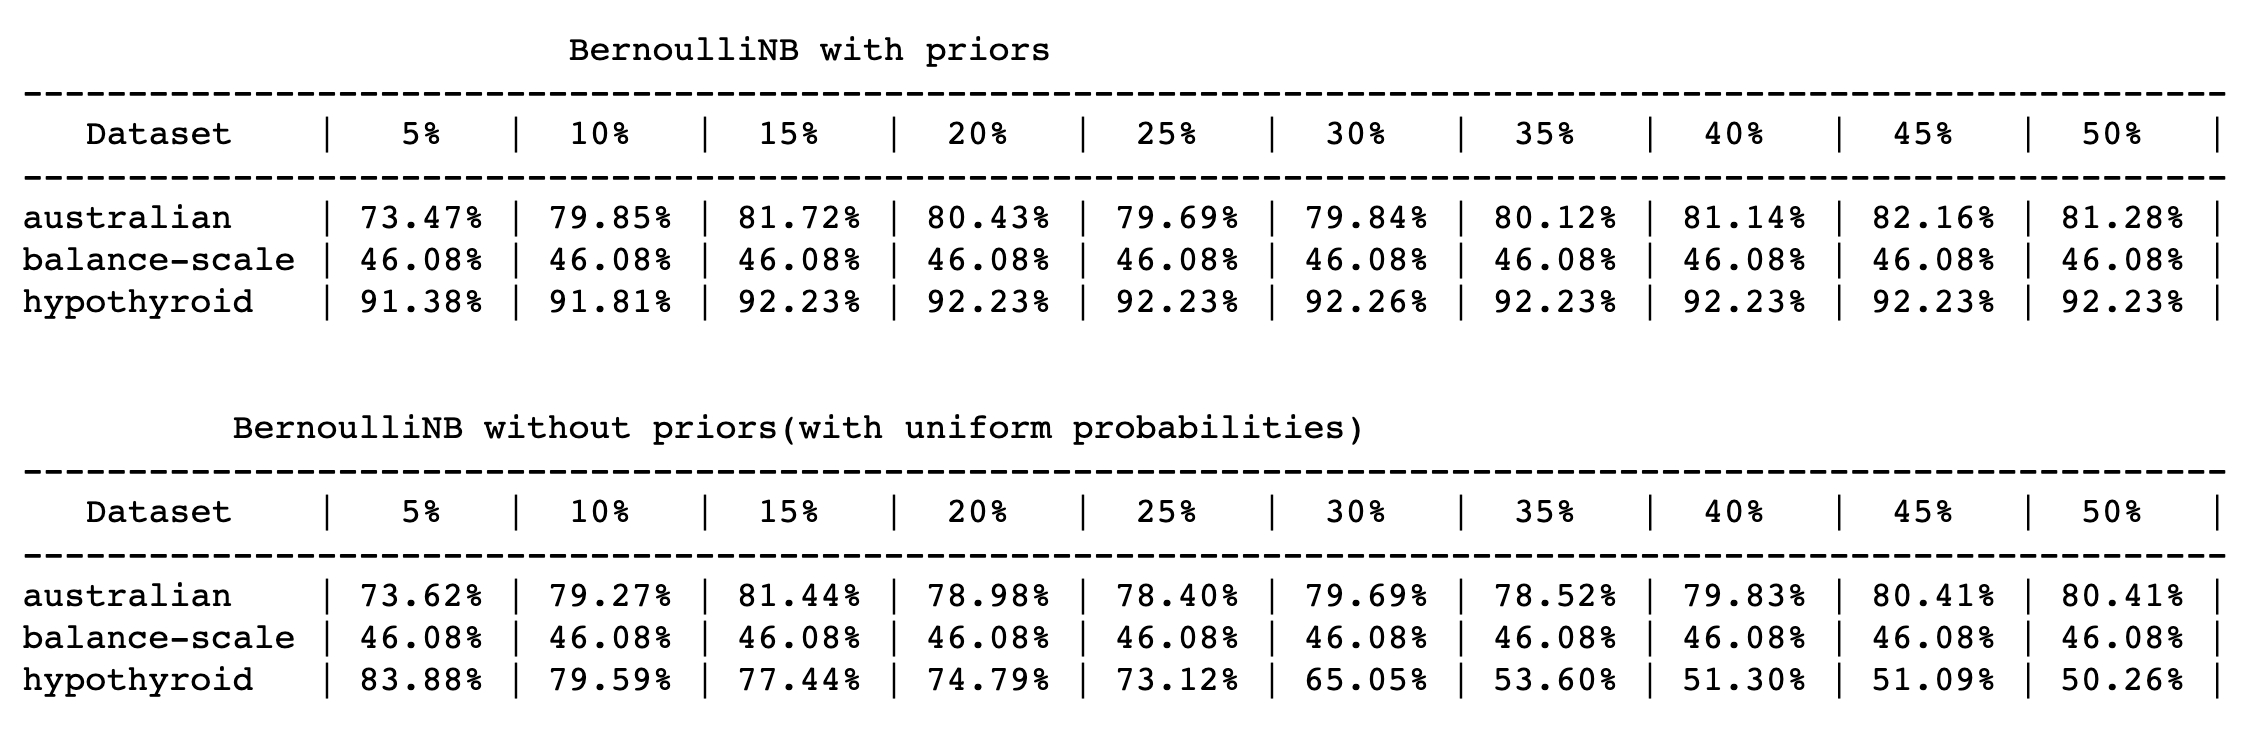

**(1)** BNB preforms better with priors   **True** 

**(2)** BNB preforms better without priors    **False**

**(3)** there is no difference in performance when using BNB with or without priors    **False**

**so the true statement is (1)**

### Question 2
**part(a). [1 mark]** 

*accuracy score for training data:  0.856682769726248*

*accuracy score for training data:  0.8314606741573034*

**part(b). [1 mark]** 

*optimal number of min_samples_leaf:  5*


**part(c). [0.5 mark]** 

*the corresponding plot shown below:*

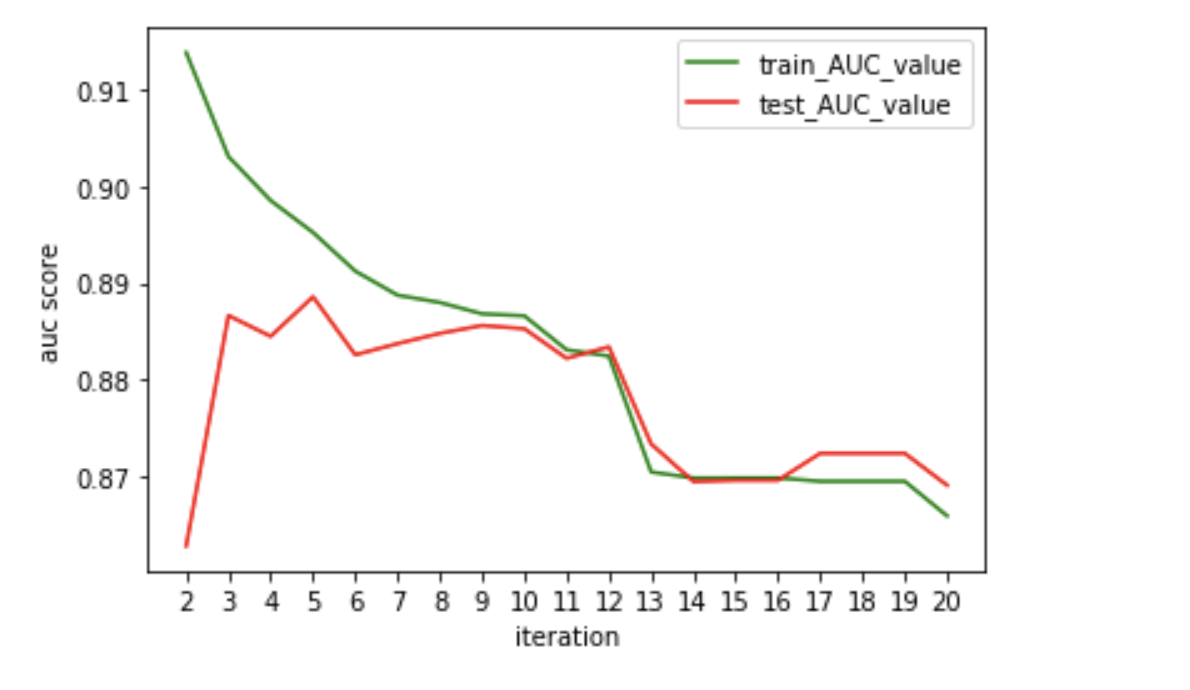


**part(d). [1 mark]** 

*posterior probability that part D:  0.36885245901639346*

### Code below

In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math
import copy

In [27]:
def pre_processing(dataframe, features):
    for ft in features:
        max_value = dataframe[ft].max()
        min_value = dataframe[ft].min()
        dataframe[ft] = [(x - min_value) / (max_value - min_value) for x in dataframe[ft]]
    return dataframe

In [28]:
# load data
csv_file = 'titanic.csv'
df = pd.read_csv(csv_file)
feature_vectors = ['Pclass', 'Sex', 'Age', 'Siblings_Spouses_Aboard', 'Parents_Children_Aboard']

df

,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,3,1,20,1,0,0
1,1,0,30,1,0,1
2,3,0,20,0,0,1
3,1,0,30,1,0,1
4,3,1,30,0,0,0
...,...,...,...,...,...,...
882,2,1,20,0,0,0
883,1,0,10,0,0,1
884,3,0,0,1,2,0
885,1,1,20,0,0,1


In [29]:
# step 1: pre-processing data
df = pre_processing(df, feature_vectors)
df

,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,1.0,1.0,0.250,0.125,0.000000,0
1,0.0,0.0,0.375,0.125,0.000000,1
2,1.0,0.0,0.250,0.000,0.000000,1
3,0.0,0.0,0.375,0.125,0.000000,1
4,1.0,1.0,0.375,0.000,0.000000,0
...,...,...,...,...,...,...
882,0.5,1.0,0.250,0.000,0.000000,0
883,0.0,0.0,0.125,0.000,0.000000,1
884,1.0,0.0,0.000,0.125,0.333333,0
885,0.0,1.0,0.250,0.000,0.000000,1


In [30]:
# split dataset
training_dataset = df.loc[0:620,:]
testing_dataset = df.loc[620:887,:]

# training data and class labels
training_dataset_x = training_dataset.loc[:, feature_vectors]
testing_dataset_x = testing_dataset.loc[:, feature_vectors]
training_dataset_y = training_dataset.loc[:, ['Survived']]
testing_dataset_y = testing_dataset.loc[:, ['Survived']]


In [31]:
clf = DecisionTreeClassifier() # create DT model
clf.fit(training_dataset_x, training_dataset_y) # train model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
from sklearn.metrics import accuracy_score
# for training data
training_predicted = clf.predict(training_dataset_x)
# print("accuracy score for training data: ", accuracy_score(training_dataset_y,training_predicted))

# for testing data
testing_predicted = clf.predict(testing_dataset_x) 
# print("accuracy score for testing data: ", accuracy_score(testing_dataset_y,testing_predicted)) 

print("accuracy score for training data: ", clf.score(training_dataset_x, training_dataset_y))
print("accuracy score for testing data: ", clf.score(testing_dataset_x, testing_dataset_y))



accuracy score for training data:  0.856682769726248
accuracy score for testing data:  0.8277153558052435


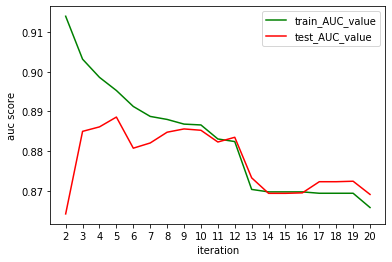

In [33]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score

iter_list = [] 
auc_train = [] # store train AUC values 
auc_test = []  # store test AUC values
for i in range(2,21,1):
    temp_clf = DecisionTreeClassifier(min_samples_leaf=i)
    temp_clf.fit(training_dataset_x, training_dataset_y)
    temp_train_predicted = temp_clf.predict_proba(training_dataset_x)
    temp_test_predicted = temp_clf.predict_proba(testing_dataset_x)
    auc_train_value = roc_auc_score(training_dataset_y, temp_train_predicted[:,1])
    auc_test_value = roc_auc_score(testing_dataset_y, temp_test_predicted[:,1])
    iter_list.append(int(i))
    auc_test.append(auc_test_value)
    auc_train.append(auc_train_value)
plt.plot(iter_list, auc_train, label="train_AUC_value", color='green')
plt.plot(iter_list, auc_test, label="test_AUC_value", color='red')
plt.xlabel("iteration")
plt.ylabel("auc score")
plt.xticks(iter_list) # show x-coordinate with details
plt.legend() # show label graphic
plt.show()
    

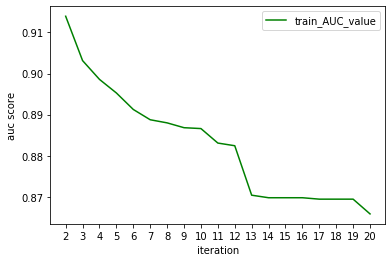

In [34]:
# for training data
plt.plot(iter_list, auc_train, label="train_AUC_value", color='green')
plt.xlabel("iteration")
plt.ylabel("auc score")
plt.xticks(iter_list) # show x-coordinate with details
plt.legend() # show label graphic
plt.show()

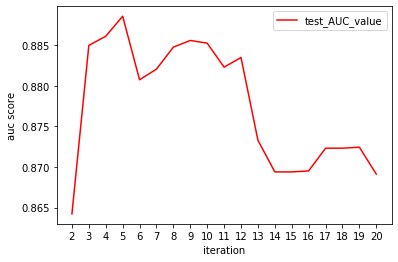

In [35]:
# for testing data
plt.plot(iter_list, auc_test, label="test_AUC_value", color='red')
plt.xlabel("iteration")
plt.ylabel("auc score")
plt.xticks(iter_list) # show x-coordinate with details
plt.legend() # show label graphic
plt.show()

In [36]:
iter_list[auc_test.index(max(auc_test))]

5

In [37]:
df

,Pclass,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Survived
0,1.0,1.0,0.250,0.125,0.000000,0
1,0.0,0.0,0.375,0.125,0.000000,1
2,1.0,0.0,0.250,0.000,0.000000,1
3,0.0,0.0,0.375,0.125,0.000000,1
4,1.0,1.0,0.375,0.000,0.000000,0
...,...,...,...,...,...,...
882,0.5,1.0,0.250,0.000,0.000000,0
883,0.0,0.0,0.125,0.000,0.000000,1
884,1.0,0.0,0.000,0.125,0.333333,0
885,0.0,1.0,0.250,0.000,0.000000,1


In [38]:
total = df[(df['Sex']==1.0)&(df['Pclass']==0.0)]
survived = total[total['Survived']==1]
len(survived)/len(total)

0.36885245901639346